## Dealing with Missing

In [1]:
import pandas as pd
from io import StringIO

data = '''A,B,C,D 
1.0,2.0,3.0,4.0
5.0,6.0,,8.0
10.0,11.0,12.0,'''

df = pd.read_csv(StringIO(data)) 
#Stringio help read the data as file since read_csv expects csv data as file

print(df)
print(df.isnull().sum())

print(df.values)

      A     B     C   D 
0   1.0   2.0   3.0  4.0
1   5.0   6.0   NaN  8.0
2  10.0  11.0  12.0  NaN
A     0
B     0
C     1
D     1
dtype: int64
[[ 1.  2.  3.  4.]
 [ 5.  6. nan  8.]
 [10. 11. 12. nan]]


ELiminating missing values

In [2]:
df.dropna(axis = 0) # ELimanatin rows with nan

print(df.dropna(axis = 0))

df.dropna(axis=1) # eliman column

print(df.dropna(axis = 1))

# To drop the colum with all nan  uses how = all instead of the axis =1

# to drop only specific column use subset = 'Column Name'

# To drop only the rows with fewer than no, use thres = 'No'

     A    B    C   D 
0  1.0  2.0  3.0  4.0
      A     B
0   1.0   2.0
1   5.0   6.0
2  10.0  11.0


Inputting   The missing values using imput

In [3]:
from sklearn.impute import SimpleImputer
import numpy as np

miss = SimpleImputer(missing_values= np.nan,strategy= "mean")
miss.fit(df.values)
Impute_Data = miss.transform(df.values)

print(Impute_Data)

# Also we can use ; it replaces the nan with mean

print(df.fillna(df.mean()))

[[ 1.   2.   3.   4. ]
 [ 5.   6.   7.5  8. ]
 [10.  11.  12.   6. ]]
      A     B     C   D 
0   1.0   2.0   3.0  4.0
1   5.0   6.0   7.5  8.0
2  10.0  11.0  12.0  6.0


# HANDLING CATEGORICAL DATA

In [4]:
dyat = pd.DataFrame([['Green','M',10.1,'Class 2'],
                    ['red','L',13.5,'Class 1'],
                    ['blue','XL',15.3,'Class 2']])
dyat.columns = ['Color','Size', 'Price','ClasssLabel']
dyat

,Color,Size,Price,ClasssLabel
0,Green,M,10.1,Class 2
1,red,L,13.5,Class 1
2,blue,XL,15.3,Class 2


In [5]:
size_mapping = {'M':1, 'L': 2, 'XL':3}

dyat['Size'] = dyat['Size'].map(size_mapping)

dyat

,Color,Size,Price,ClasssLabel
0,Green,1,10.1,Class 2
1,red,2,13.5,Class 1
2,blue,3,15.3,Class 2


Class Mapping using sklearn

In [6]:
from sklearn.preprocessing import LabelEncoder

cls_lab = LabelEncoder()

y = cls_lab.fit_transform(dyat['ClasssLabel'])

#TO TRANSFORM BACK
cls_lab.inverse_transform(y)
#print(y)

array(['Class 2', 'Class 1', 'Class 2'], dtype=object)

# Performing one-hot encoding on nominal features

In [7]:
from sklearn.preprocessing import OneHotEncoder
dyat
# Converting  The color to the integer
X= dyat[['Color','Size','Price']].values
# X[:,0] = cls_lab.fit_transform(X[:,0])

colr_enc =  OneHotEncoder()

re = colr_enc.fit_transform(X[:,0].reshape(-1,1)).toarray()
print(re)
#Please not it  has convert to 100,010,001 based on binary

# If we wanted to select multiple columne we could have used COlumn transformer

# Another simpler way is using get dummies
pd.get_dummies(dyat[['Color','Size','Price']], drop_first= True)

# and If you can note we can remove one feature such as gree; using drop_first =  true which won`ts affect anything` since other colors are well represented









[[1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]]


,Size,Price,Color_blue,Color_red
0,1,10.1,False,False
1,2,13.5,False,True
2,3,15.3,True,False


## Partitioning a dataset into separate training and test datasets

In [8]:
df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', header = None)

df_wine.columns = ['Class label', 'Alcohol','Malic acid', 'Ash','Alcalinity of ash', 'Magnesium','Total phenols', 'Flavanoids','Nonflavanoid phenols','Proanthocyanins','Color intensity', 'Hue','OD280/OD315 of diluted wines','Proline']
print(f'Class_labesl{pd.unique(df_wine['Class label'])}')

print(df_wine)

Class_labesl[1 2 3]
     Class label  Alcohol  Malic acid   Ash  Alcalinity of ash  Magnesium  \
0              1    14.23        1.71  2.43               15.6        127   
1              1    13.20        1.78  2.14               11.2        100   
2              1    13.16        2.36  2.67               18.6        101   
3              1    14.37        1.95  2.50               16.8        113   
4              1    13.24        2.59  2.87               21.0        118   
..           ...      ...         ...   ...                ...        ...   
173            3    13.71        5.65  2.45               20.5         95   
174            3    13.40        3.91  2.48               23.0        102   
175            3    13.27        4.28  2.26               20.0        120   
176            3    13.17        2.59  2.37               20.0        120   
177            3    14.13        4.10  2.74               24.5         96   

     Total phenols  Flavanoids  Nonflavanoid phenols  P

In [9]:
from sklearn.model_selection import train_test_split

X,Y = df_wine.iloc[:,1:].values, df_wine.iloc[:,0].values

x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size= 0.3,random_state=42, stratify = Y)

## FEATURE SCALING
# It can be done using normalization or standardaziation


EXAMPLE OF NORMALIZER{Keep it in range}; MIN-MAX SCALER
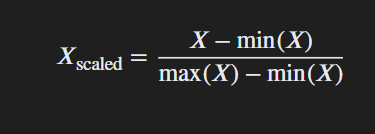


In [10]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
x_train_norm = mms.fit_transform(x_train)

x_test_norm = mms.transform(x_test)

To STANDARDIZE[KEEP IT 0 MEAND AND DEV 1]
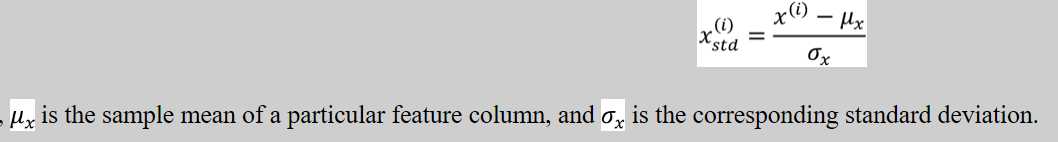

A comparison between the standardizer and normalizer: 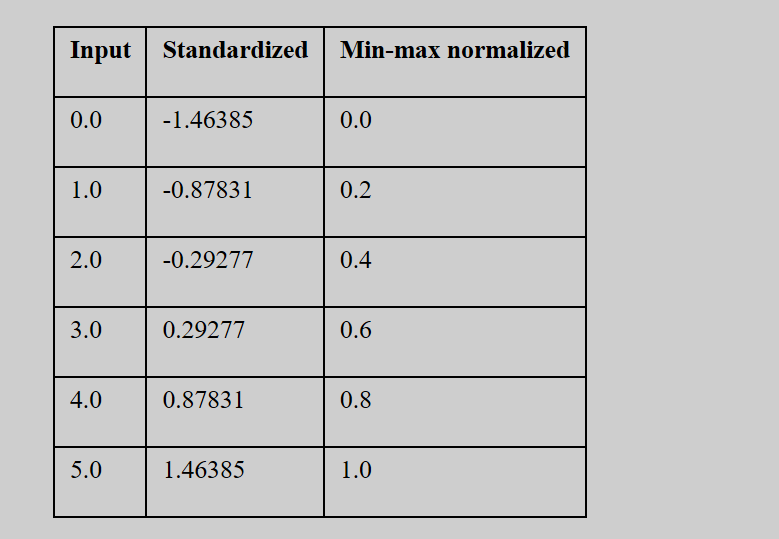

And note the stardized mean we willin x_train, will also be used in the testing data

In [11]:
from sklearn.preprocessing import StandardScaler
ssc = StandardScaler()

x_train_std = ssc.fit_transform(x_train)

x_test_std = ssc.transform(x_test)



## SELECTING MEANINGFULL FEATURES

# PREVENTING OVERFTING thorugh L1 and L2
# L1 and L2 regularization as penalties agains model complexity

L1(Lasso) tend to produce sparse weight meaning many of the weights becomes exactly 0, while L2 (Ridge)keeps all weights small but not 0

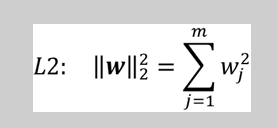
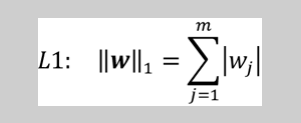
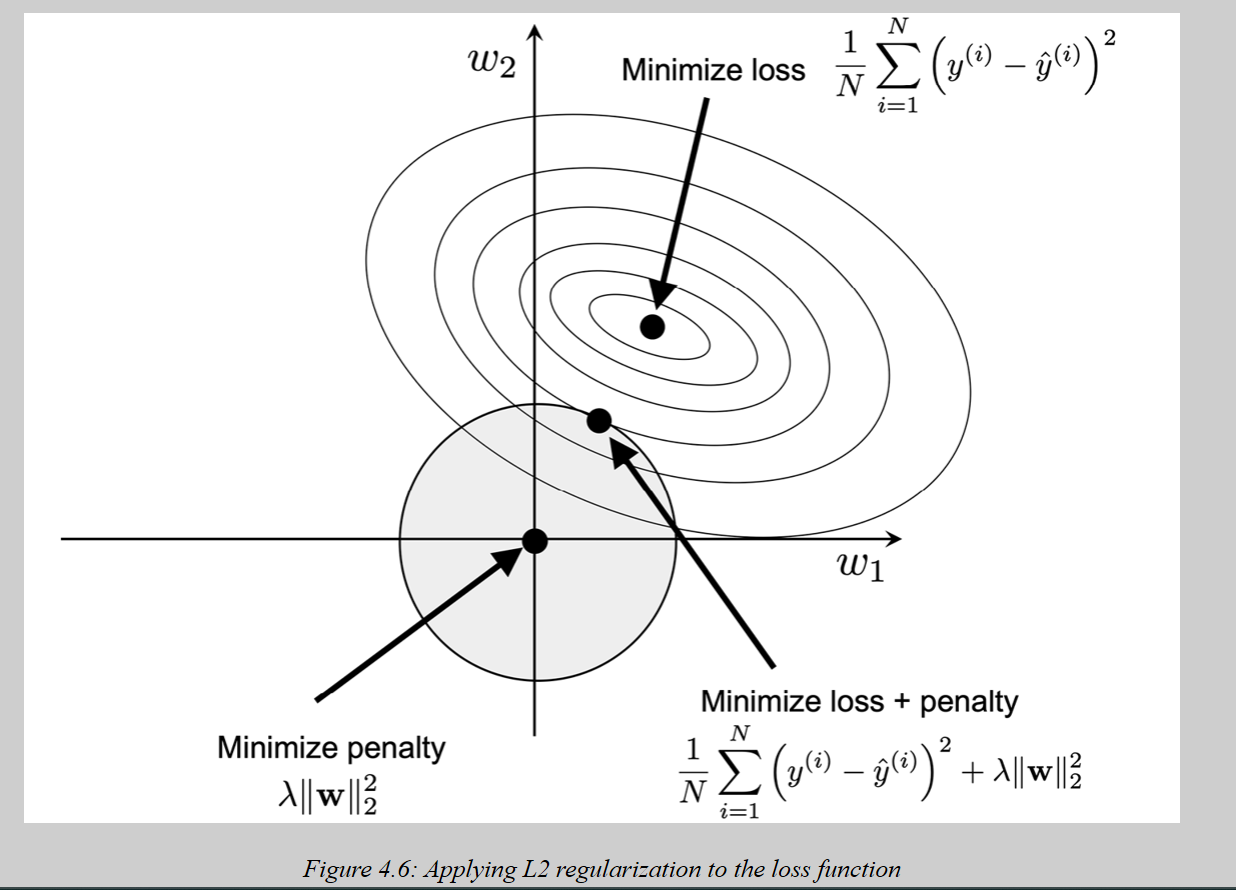

In [12]:
from sklearn.linear_model import LogisticRegression
LogisticRegression(penalty='l1', solver = 'liblinear', multi_class= 'ovr')



LogisticRegression(multi_class='ovr', penalty='l1', solver='liblinear')

In [13]:
lr = LogisticRegression(penalty= 'l1', solver='liblinear', C= 1.0, multi_class= 'ovr')
lr.fit(x_train_std,y_train)
print(f"The training accuracy score is{lr.score(x_train_std,y_train)}")
print(f"The test accuracy score is f{lr.score(x_test_std,y_test)}")

The training accuracy score is1.0
The test accuracy score is f0.9814814814814815


c:\Users\Aron\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


Note: In scikit-learn, intercept_ corresponds to the bias unit and coef_ corresponds to the values wj.

c:\Users\Aron\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\Aron\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\Aron\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\Aron\AppData\

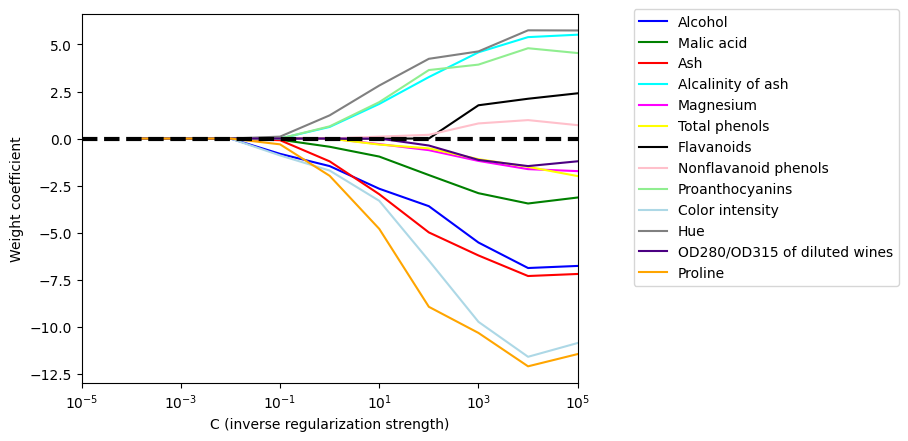

In [14]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = plt.subplot(111)
colors = ['blue', 'green', 'red', 'cyan','magenta', 'yellow', 'black','pink', 'lightgreen', 'lightblue','gray', 'indigo', 'orange']
weights, params = [],[]

for c in range(-4,6):
    lr = LogisticRegression(penalty= 'l1',solver='liblinear', C= 10.**c, multi_class= 'ovr')
    lr.fit(x_train_std,y_train)
    weights.append(lr.coef_[1])
    params.append(10**c)

weights = np.array(weights)
#note ,shape[] returns no of columns
for column,color in zip(range(weights.shape[1]), colors):
    plt.plot(params, weights[:,column], color = color, label = df_wine.columns[column + 1])

plt.axhline(0, color = 'black', linewidth = 3, linestyle = '--')
plt.xlim([10** -5, 10** 5])
plt.ylabel('Weight coefficient')
plt.xlabel('C (inverse regularization strength)')
plt.xscale('log')
plt.legend(loc='upper left')
ax.legend(loc = 'upper center', bbox_to_anchor = (1.38, 1.03),ncol = 1 )


# Sequential feature selection algorithms
# SEQUENTIAL BACKWARD SELECTION

SBS sequentially removes features from the full feature subset until the new feature subspace contains the desired number of features. To determine which feature is to be removed at each stage, we need to define the criterion function, J, that we want to minimize.

In [15]:
from sklearn.base import clone
from itertools import combinations
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

class SBS:
    def __init__(self,estimator, k_features, scoring = accuracy_score, test_size = 0.25, random_state = 42):
        self.scoring = scoring
        self.k_features  = k_features
        self.test_size =  test_size
        self.random_state = random_state

    def fit(self, X,Y):
        x_train,x_test, y_train, y_test = train_test_split(X,Y, test_size= self.test_size, random_state= self.random_state)
        dim = x_train.shape[1]
        self.indices_ = tuple(range(dim))
        self.subsets_ = [self.indices_]

        score = self._calcscore(x_train, y_train, x_test, y_test, self.indices_)
        self.scores_ = [score]
        while dim > self.k_features:
            scores = []
            subsets = []
            for p in combinations(self.indices_, r=dim -1 ):
                score = self._calcscore(x_train, y_train, x_test, y_test, p)
                scores.append(score)
                subsets.append(p)
                best = np.argmax(scores)
                self.indices_ = subsets[best]
                self.subsets_.append(self.indices_)
                dim -=1
                self.scores_.append(scores[best])
                self.k_score_ = self.scores_[-1]
                return self
    def transform(self, X):
        return X[:,self.indices_]
    

    def _calcscore(x_train, y_train, x_test, y_test, indices):
        self.estimator.fit(x_train[:,indices], y_train)
        y_pred = self.estimator.predict(x_test[:, indices])
        score = self.scoring(y_test, y_pred)
        return score
        



        

In [ ]:
import matplotlib.pyplot as plt
